# Caso de estudio -- Analisis de las series ofrecidas en OroroTV

En el siguiente estudio se busca analizar los siguientes aspectos :

* ¿Qué series les gusta mas a los usuarios?
* ¿Cuales series tienen baja puntuación?
* Cantidad de series por genero
* ¿Cual es el genero que mas consumen los usuarios de OroroTV?
* ¿Cual es la franquicia con mejor puntuación?

**Autor:** @lexbonell@

**NOTA:** Esta información se recolecto solo para uso ***didactico***, es su responsabilidad el manejo externo que usted le dara .

In [1]:
import requests 
import numpy as np 
from bs4 import BeautifulSoup  
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Cargamos información de la pagina web 

In [2]:
r=requests.get('https://ororo.tv/es/shows')

# Revisamos si tenemos información de las series 

Siempre que deseemos extraer informacion de una web  una buena opción es usar **`request`** que basicamente  es un wrapper de urllib junto con otros módulos de python para proporcionar métodos sencillos con estructura REST, pues esta tiene los métodos “post”, “get”, “put”, “patch”, “delete”, “head” y “options”, todo lo necesario para consumir un API sin problemas.


In [3]:
# Verficamos el resultado de nuestra petición

r.text

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n\n\n<title>ororo.tv | 520: Web server is returning an unknown error</title>\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection" />\n<!--[if lt IE 9]><link rel="stylesheet" id=\'cf_styles-ie-css\' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->\n<styl

**NOTA:** Como podemos observar no obtuvimos la información que deseabamos que eran las series y esto pasa a menudo ya que cada vez mas las empresas van a cuidar sus datos con mayores niveles de seguridad. 

# ¿ Qué hacer en esos casos ?

Vamos a dirigirnos a nuestra pagina principal **`url`** que deseamos consultar y abrir el ***codigo fuente*** con el comando **`Ctrl + U`** para revisar como esta estructurada la información deseada para extraerla , en este caso especial se encuentra almacenada en una especie de diccionario el cual vamos a copiar en un archivo de texto y luego abrirlo con la libreria `Pandas` de Python. 

# Cargamos los archivos para su lectura

In [4]:

# Cargamos los archivos dentro de nuestra carpeta teniendo en cuenta la extension

path_to_file = os.getcwd()
all_files = [files for files in os.listdir(path_to_file) if files.endswith('.txt')]


In [5]:
all_files

['add6.txt',
 'add10.txt',
 'add5.txt',
 'add9.txt',
 'add11.txt',
 'add1.txt',
 'add2.txt',
 'add3.txt',
 'add8.txt',
 'add4.txt',
 'add7.txt']

In [6]:
# Creamos ciclo para leer los archivos 
final=[]
for i in range(len(all_files)):
    k = open(path_to_file+'/'+all_files[i])
    todos = k.read()
    final.append(todos)

# Extraemos toda la información de las series

* Id serie
* Titulo de la serie
* Genero de la serie 
* Año de estreno
* Rating serie
* Descripción 


In [7]:
final[0].split('},')[13].split(',')[0].split(':')[1] # Id de la serie

'1286'

In [8]:
final[0].split('},')[13].split(',')[1].split(':')[1].replace('"',"") # Titulo de la serie

'The Resident'

In [9]:
final[0].split('},')[13].split(',')[2].split(':')[1].replace('"',"") # Genero de la serie

'Drama'

In [10]:
final[0].split('},')[13].split('year')[1].split(',')[0].split(':')[1].replace('"',"") # Año de estreno

'2018'

In [11]:
final[0].split('},')[13].split('imdb')[1].split(',')[0].split(':')[1] # Rating serie 

'null'

In [12]:
final[0].split('},')[13].split('desc')[1].split('"')[2] # Descripcion de la serie 

'A tough, brilliant senior resident guides an idealistic young doctor through his first day, pulling back the curtain on what really happens, both good and bad, in modern-day medicine.'

In [13]:
final[0].split('},')[5].split("network")[1].split('"')[2]

'American Broadcasting Company'

In [14]:
len(final)  # Numero de archivos

11

# Creamos las listas para  cargar el DataFrame final

In [15]:
ID_serie=[]
Title_serie=[]
Gender_serie=[]
Rating=[]
Year=[]
Desc=[]
Home=[]
for j in range (len(final)):
    for i in range(60):
        ID_serie.append(final[j].split('},')[i].split(',')[0].split(':')[1])
        Title_serie.append(final[j].split('},')[i].split(',')[1].split(':')[1].replace('"',""))
        Gender_serie.append(final[j].split('},')[i].split('translated')[1].split(':')[1].split(',')[0].replace('"',""))
        Year.append(final[j].split('},')[i].split('year')[1].split(',')[0].split(':')[1].replace('"',""))
        Rating.append(final[j].split('},')[i].split('imdb')[1].split(',')[0].split(':')[1])
        Desc.append(final[j].split('},')[i].split('desc')[1].split('"')[2])
        Home.append(final[j].split('},')[i].split("network")[1].split('"')[2])

# Eliminamos los caracteres especiales de genero como :

*  Animaci\u00f3n  
*  Biograf\u00eda 

In [16]:
len(Gender_serie)

660

In [17]:
Gender_edit=[]
for i in range(len(Gender_serie)):
    Gender_edit.append(Gender_serie[i].replace('\\u00f3', 'ó'))
    
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------

Gender_edit2=[]
for i in range (len(Gender_serie)):
    Gender_edit2.append(Gender_edit[i].replace('\\u00ed', 'í'))

In [18]:
# Creamos nuestro DataFrame para hacer las consultas respectivas 

In [19]:
data={'ID_serie':ID_serie,'Title_serie':Title_serie,'Gender_serie':Gender_edit2,'Year':Year,'Rating':Rating,'Desc':Desc,'Home':Home}

In [20]:
movies=pd.DataFrame(data)

In [21]:
movies['Title_serie'].value_counts().head()

Sex And The City    4
Firefly             4
Six Feet Under      4
The Sopranos        4
Extra               4
Name: Title_serie, dtype: int64

In [22]:
movies=movies.drop_duplicates('Title_serie')

In [23]:
len(movies)   # Se pudieron extraer informacion de 487 series de 1264  cerca de un 39 % de la info

487

# Series sin calificación 

In [24]:
movies.loc[movies['Rating']=='null','Rating']=''

# Top 10 mejores series

In [25]:
movies.sort_values(by='Rating',ascending=False).head(10) # Top 10 mejores series 

,ID_serie,Title_serie,Gender_serie,Year,Rating,Desc,Home
240,1241,Blue Planet II,Documental,2017,9.9,Sir David Attenborough returns to the ocean wa...,BBC One
241,1645,Our Planet,Documental,2019,9.8,Experience our planet's natural beauty and exa...,Netflix
242,1745,The Dark Crystal,Ciencia ficción,2019,9.8,"Return to the world of Thra, where three Gelfl...",Netflix
243,993,Planet Earth II,Documental,2016,9.7,David Attenborough returns in this breathtakin...,BBC One
244,1527,Dynasties,Documental,2018,9.7,Follow the true stories of five of the world's...,BBC One
245,1672,Chernobyl,Drama,2019,9.7,A dramatization of the true story of one of th...,HBO
246,1751,Wu-Tang An American Saga,Drama,2019,9.6,"In the early 1990's in New York, during the he...",Hulu
247,994,The Grand Tour,Comedia,2016,9.6,"Follow Jeremy, Richard, and James, as they emb...",Amazon
65,73,Planet Earth,Documental,2006,9.5,Prepare to see it as never before.,BBC One
249,388,Band of Brothers,Acción,2001,9.5,The story of Easy Company of the US Army 101st...,HBO


# Top 10 series con menos puntuación

In [26]:
movies[movies['Rating']!=''].sort_values(by='Rating',ascending=False).tail(10) # Top 10 series con menos puntuación 

,ID_serie,Title_serie,Gender_serie,Year,Rating,Desc,Home
430,1732,The Family (2019),Documental,2019,4.2,An enigmatic conservative Christian group know...,Netflix
428,1421,The Outpost,Ciencia ficción,2018,4.1,"Talon, the lone survivor of a race called the ...",The CW
427,594,I Am Cait,Documental,2015,3.8,Follows the transformation of Bruce Jenner fro...,E!
128,1754,The I-Land,Drama,2019,3.7,"Wiped clean of memories and thrown together, a...",Netflix
36,1788,Batwoman,Acción,2019,3.6,Armed with a great passion for social justice ...,The CW
424,1434,All About The Washingtons,Comedia,2018,3.5,The wife of a legendary rapper launches her ow...,Netflix
387,1774,Perfect Harmony,Comedia,2019,3.3,When former Princeton music professor Arthur C...,NBC
422,1477,Magnum P.I.,Drama,2018,2.9,"Thomas Magnum, a decorated former Navy SEAL wh...",CBS
421,1314,Troy,Guerra,2018,2.5,"A rich story of love, intrigue, betrayal and b...",BBC One
420,1251,Sea Oak,Comedia,2017,0.0,A lonesome woman comes back from the dead to l...,Amazon


 # Cantidad de series por genero

In [27]:
movies['Gender_serie'].value_counts()

Drama              161
Comedia            145
Crimen              39
Acción              39
Documental          30
Animación           29
Ciencia ficción     11
Aventura            10
Misterio             7
                     4
Biografía            3
Reality              2
Suspense             2
Concurso             1
Fantasía             1
Guerra               1
Familiar             1
Noticias             1
Name: Gender_serie, dtype: int64

In [28]:
Count_By_Gender=pd.DataFrame(movies['Gender_serie'].value_counts())

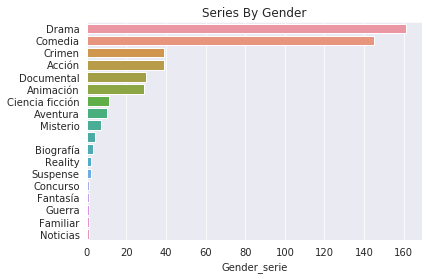

In [29]:
sns.set_style(style='darkgrid')
plt.title('Series By Gender')
sns.barplot(x=Count_By_Gender['Gender_serie'],y=Count_By_Gender.index)

# Genero que mas le gusta a los  usuarios de Ororo.TV

In [30]:
pelis=movies[movies['Rating']!='']
pelis['Rating']=pelis['Rating'].apply(lambda x : float(x))

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
test=pelis[['Gender_serie','Rating']].groupby(by='Gender_serie').mean()
Rating_Avg_ByGender=test.reset_index(inplace=False)
Rating_Avg_ByGender=Rating_Avg_ByGender.sort_values(by='Rating',ascending=False)
Rating_Avg_ByGender

,Gender_serie,Rating
9,Documental,8.317241
3,Aventura,8.250000
12,Fantasía,8.100000
2,Animación,8.086207
8,Crimen,7.858974
17,Suspense,7.350000
10,Drama,7.296732
1,Acción,7.291892
6,Comedia,7.208088
5,Ciencia ficción,7.070000


# Franquicias con mejor puntuacion

In [32]:
pelis[['Home','Rating']].groupby(by='Home').mean().sort_values(by='Rating',ascending=False).reset_index(inplace=False).head(10)

,Home,Rating
0,Adult Swim,9.30
1,Boomerang,9.30
2,YouTube Premium,9.30
3,PBS,9.20
4,ESPN,9.00
5,CBBC,8.90
6,ABC1,8.80
7,DC Universe,8.65
8,YouTube Red,8.60
9,Cartoon Network,8.55


# Genero con mejor calificación

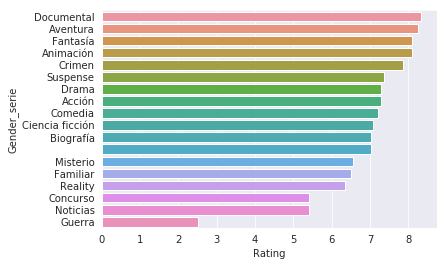

In [33]:
sns.barplot(x=Rating_Avg_ByGender['Rating'],y=Rating_Avg_ByGender['Gender_serie'])

# **FINAL.......**